In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv('data_log.csv')
dataset.tail()

,db,total_tweets,total_users,user_ratio_0,tweet_ratio_0,tweet_per_user_mean_0,tweet_per_user_std_0,tweet_fav_mean_0,tweet_fav_std_0,tweet_rt_mean_0,...,tweet_rt_mean_3,tweet_rt_std_3,user_ratio_4,tweet_ratio_4,tweet_per_user_mean_4,tweet_per_user_std_4,tweet_fav_mean_4,tweet_fav_std_4,tweet_rt_mean_4,tweet_rt_std_4
22,hta_24,3.676236,3.413635,0.535880,0.515701,0.134449,0.248617,0.086871,0.313100,0.037116,...,0.040077,0.182441,0.028164,0.018757,0.026360,0.147172,0.037328,0.187669,0.024765,0.129351
23,hta_25,4.245118,4.064608,0.683213,0.647975,0.079097,0.193423,0.264046,0.486225,0.064071,...,0.119682,0.394616,0.018183,0.015639,0.066464,0.169915,0.237516,0.473806,0.072451,0.282937
24,hta_26,3.422261,3.035830,0.774401,0.773449,0.218184,0.314065,0.156347,0.409750,0.046857,...,0.000000,0.000000,0.021179,0.013994,0.098055,0.243099,0.177955,0.375287,0.089967,0.317239
25,hta_27,4.050689,3.553762,0.566080,0.627247,0.318767,0.388618,0.267233,0.485281,0.078319,...,0.019716,0.098421,0.074602,0.044403,0.138606,0.251435,0.053313,0.170263,0.002766,0.036831
26,hta_28,4.469410,4.055722,0.495118,0.455483,0.212019,0.312825,0.167185,0.453980,0.094365,...,0.128134,0.420560,0.024189,0.012317,0.068534,0.173776,0.148136,0.488413,0.110138,0.403422


In [3]:
dt2 = pd.DataFrame(
    data=dataset,
    columns=[
        'total_tweets', 'tweet_ratio_0', 'tweet_ratio_1', 'tweet_ratio_2', 'tweet_ratio_3', 'tweet_ratio_4',
        'tweet_per_user_mean_0', 'tweet_per_user_mean_1', 'tweet_per_user_mean_2', 'tweet_per_user_mean_3','tweet_per_user_mean_4',
    ]
)

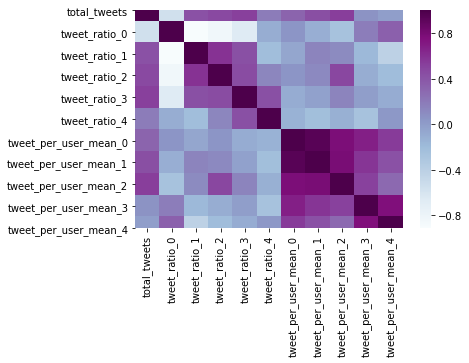

In [4]:
corr = dt2.corr()
sns.heatmap(corr, cmap='BuPu')

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0xe621)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
l = [
    'total_tweets', 'tweet_ratio_0', 'tweet_ratio_1', 'tweet_ratio_2', 'tweet_ratio_3', 'tweet_ratio_4'
]

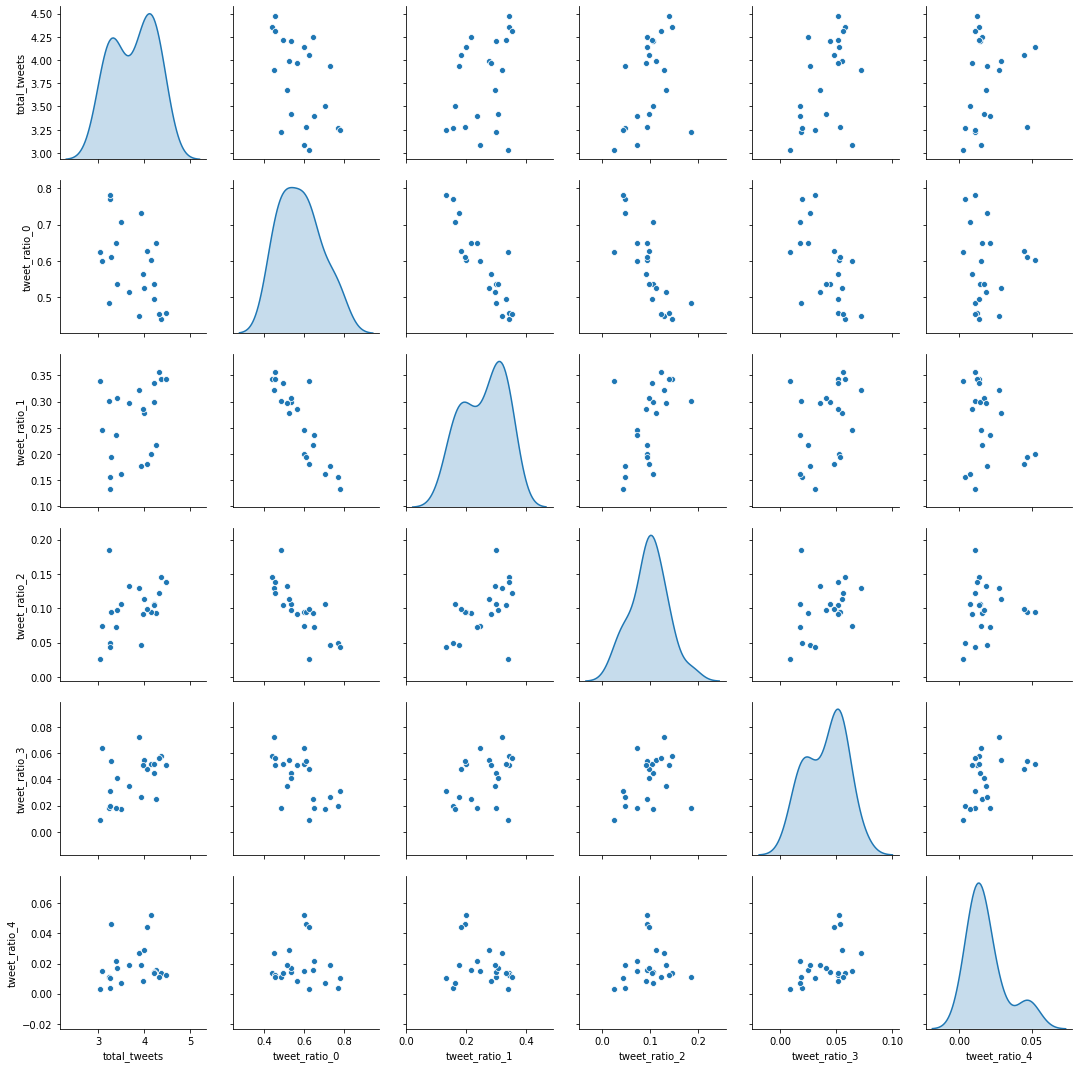

In [8]:
sns.pairplot(train_dataset[l], diag_kind="kde")

In [9]:
train_labels = train_dataset.pop('total_tweets')
train_db = train_dataset.pop('db')
test_labels = test_dataset.pop('total_tweets')
test_db = test_dataset.pop('db')

In [29]:
train_stats = train_dataset.describe()
# train_stats.pop("total_tweets")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
total_users,22.0,3.466765,0.450125,2.697229,3.086617,3.607834,3.863253,4.064608
user_ratio_0,22.0,0.602922,0.094780,0.462426,0.527385,0.584446,0.676024,0.772575
tweet_ratio_0,22.0,0.582109,0.103907,0.441322,0.499669,0.582053,0.642793,0.781215
tweet_per_user_mean_0,22.0,0.148634,0.067331,0.036702,0.110346,0.133744,0.185176,0.318767
tweet_per_user_std_0,22.0,0.265267,0.069096,0.119444,0.231681,0.260234,0.304443,0.410860
tweet_fav_mean_0,22.0,0.297145,0.205099,0.086871,0.176029,0.250452,0.336762,1.039756
tweet_fav_std_0,22.0,0.549828,0.194639,0.313100,0.431798,0.516454,0.628129,1.156511
tweet_rt_mean_0,22.0,0.149149,0.147651,0.036894,0.065798,0.113961,0.182208,0.726488
tweet_rt_std_0,22.0,0.395734,0.176497,0.182481,0.265635,0.386438,0.463819,0.943342
user_ratio_1,22.0,0.238268,0.061078,0.126476,0.188168,0.255279,0.289507,0.337778


In [11]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [12]:
def build_model():
  model = keras.Sequential([
    layers.Dense(41, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(82, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 41)                1722      
_________________________________________________________________
dense_1 (Dense)              (None, 82)                3444      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 83        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.006374,0.077470,0.006374,0.976700,0.824617,0.976700,995
996,0.007459,0.085463,0.007459,0.815670,0.750795,0.815670,996
997,0.008647,0.091507,0.008647,0.988988,0.833424,0.988988,997
998,0.010805,0.100092,0.010805,0.809535,0.745548,0.809535,998
999,0.010214,0.096761,0.010214,0.978190,0.828409,0.978190,999


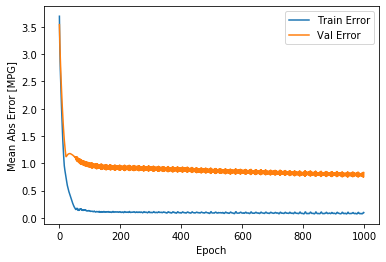

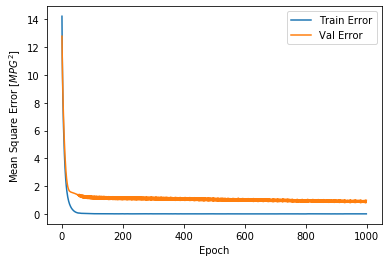

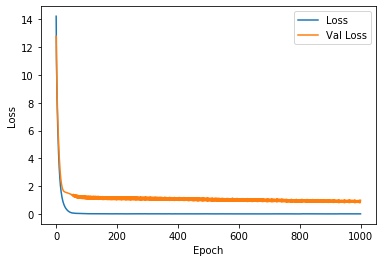

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    #   plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    #   plt.ylim([0,20])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Loss')
    plt.plot(hist['epoch'], hist['val_loss'],
           label='Val Loss')
    plt.legend()

    plt.show()


plot_history(history)


...................................................................................................

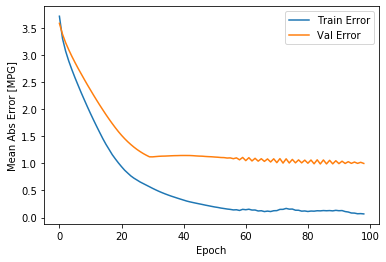

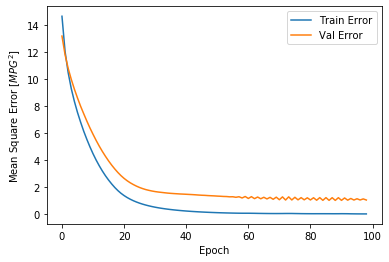

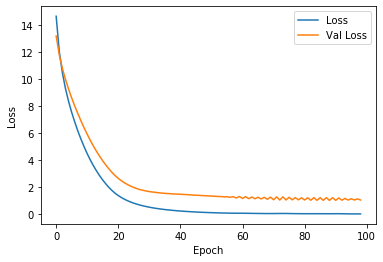

In [17]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [18]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

5/5 - 0s - loss: 0.4487 - mae: 0.5677 - mse: 0.4487
Testing set Mean Abs Error:  0.57 MPG


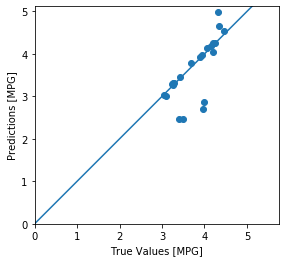

In [19]:
test_predictions = model.predict(normed_train_data).flatten()

plt.scatter(train_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
# plt.savefig('owo.png')

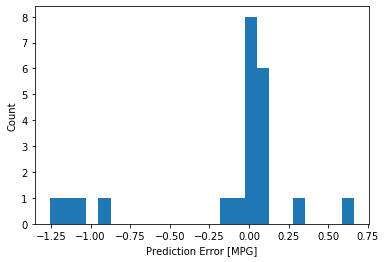

In [20]:
error = test_predictions - train_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 41)                1722      
_________________________________________________________________
dense_4 (Dense)              (None, 82)                3444      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 83        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________
